In [9]:
import torch
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
torch.set_default_dtype(torch.float64)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import coeff as cf
import samplepaths as sp

In [10]:
pde_params={'dim':2,
                'kappa':[0.,1.,0.8,0.6,0.4,0.5,0.3,0.2,0.1,0.7], # The first kappa=0 because the drift of wealth process is zero
                'theta':[0.,0.4,0.2,0.3,0.4,0.5,0.4,0.3,0.2,0.1],
                # 'nu':[0.02,0.015,0.11,0.12,0.01,0.013,0.14,0.14,0.01], #Hung's params
                'nu':[0.2,0.15,0.11,0.12,0.1,0.13,0.14,0.14,0.1], # we do not like vanishing diffusion coefficient
                # 'lb':torch.tensor([0.,0.15,0.11,0.12,0.13,0.15,0.11,0.12,0.13,0.15]).to(device),   Hung's params
                'lb':[0.,1.5,1.11,0.12,0.13,0.15,0.11,0.12,0.13,0.15], # New params Make closed form solution more sensitive to time
                'rho':[0.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
                'eta':0.5,
                'T': 1.,#torch.tensor([1.]).to(device),
    }
t0 = time.time()
num_samples = 2**16
num_time_intervals = 30
max_dim = 10
size = num_samples* max_dim * num_time_intervals
iid = torch.randn(size=[size]).to(device)
print("It takes {:.0f} ms to generate {:,} iid samples.".format(round(1000*(time.time()-t0),6),size))
sim_params={'num_samples':2**10,
        'num_time_intervals': 10,
        'iid':iid,
        'start' : 0.9,  
        'end' : 1.1,
        'num_neurons':6
        }

It takes 262 ms to generate 19,660,800 iid samples.


In [11]:
mu = cf.OU_drift_semi(pde_params)
rand_diff = torch.tensor([3.])
sigma = cf.custom_diff(pde_params,rand_diff)

In [12]:
data = sp.data_gen(sigma,mu,pde_params,sim_params)

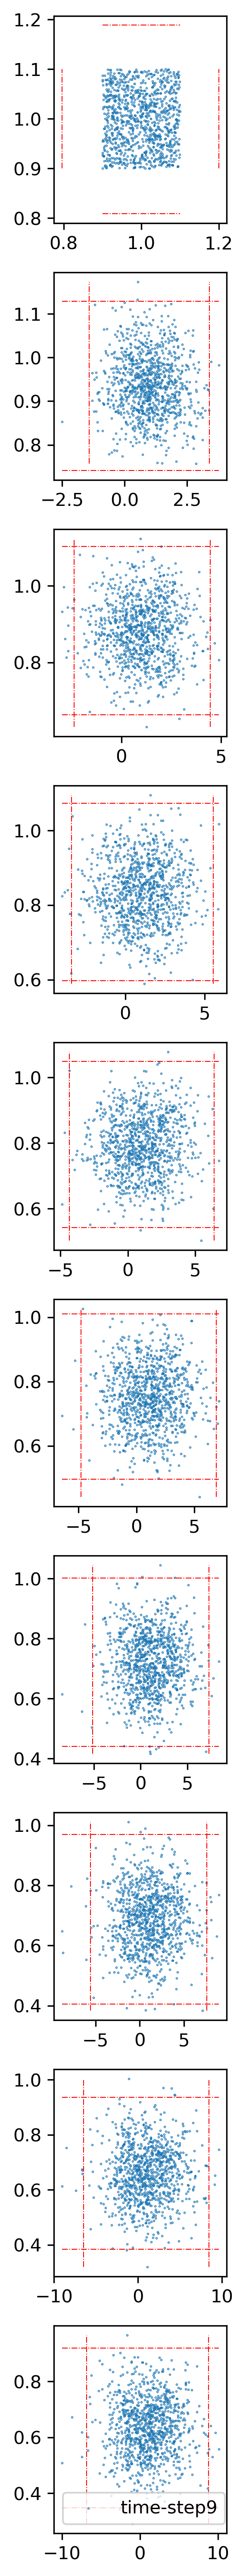

In [13]:
f,ax = plt.subplots(sim_params['num_time_intervals'],1,figsize = (2,sim_params['num_time_intervals']*2),dpi=300)
for i in range(sim_params['num_time_intervals']):
    q13 = np.quantile(data.x[:,1,i], [0.25,0.75])
    iqr = q13[1]-q13[0]
    rmin = q13[0]- 1.5*iqr
    rmax = q13[1]+ 1.5*iqr
    ax[i].vlines(x=[rmin,rmax], ymin = data.x[:,2,i].min(),ymax = data.x[:,2,i].max(),color = 'r',linestyle='-.',linewidth=0.5)
    q13 = np.quantile(data.x[:,2,i], [0.25,0.75])
    iqr = q13[1]-q13[0]
    rmin = q13[0]- 1.5*iqr
    rmax = q13[1]+ 1.5*iqr
    ax[i].hlines(y=[rmin,rmax], xmin = data.x[:,1,i].min(),xmax = data.x[:,1,i].max(),color = 'r',linestyle='-.',linewidth=0.5)
    ax[i].scatter(data.x[:,1,i],data.x[:,2,i], label='time-step' + str(i),s=0.1);
plt.legend();
plt.tight_layout();
mpl.rc('xtick', labelsize=10) 
mpl.rc('ytick', labelsize=10) 

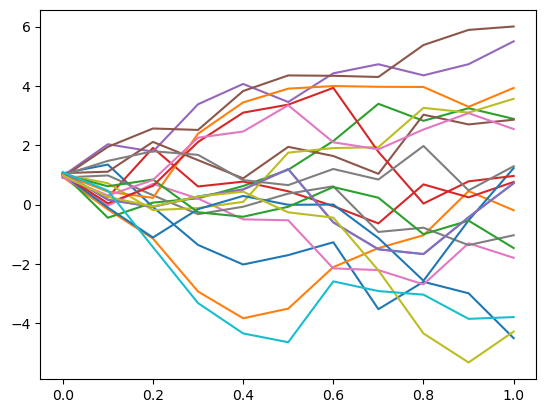

In [14]:
for i in np.random.randint(0, data.x.shape[0], 20): 
    plt.plot(data.x[i,0,:],data.x[i,1,:])

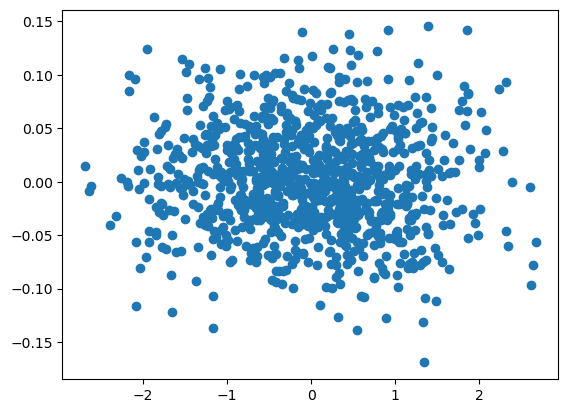

In [15]:
plt.scatter(data.sigmadw[:,0,-1],data.sigmadw[:,1,-1]);

In [16]:
data.sigma(data.x[:,:,-1])

tensor([[[3.0000, 0.0000],
         [0.0000, 0.1500]],

        [[3.0000, 0.0000],
         [0.0000, 0.1500]],

        [[3.0000, 0.0000],
         [0.0000, 0.1500]],

        ...,

        [[3.0000, 0.0000],
         [0.0000, 0.1500]],

        [[3.0000, 0.0000],
         [0.0000, 0.1500]],

        [[3.0000, 0.0000],
         [0.0000, 0.1500]]])